In [2]:
# Importing dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
# Reading the data
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [4]:
# Exploring the data

In [5]:
df.shape

(70692, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [7]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [8]:
bmi = df['BMI'].value_counts()
bmi.head()

27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
Name: BMI, dtype: int64

In [9]:
genhlth = df['GenHlth'].value_counts()
genhlth.head()

3.0    23427
2.0    19872
4.0    13303
1.0     8282
5.0     5808
Name: GenHlth, dtype: int64

In [10]:
menthlth = df['MentHlth'].value_counts()
menthlth.head()

0.0     48091
30.0     4320
2.0      3267
5.0      2519
1.0      2051
Name: MentHlth, dtype: int64

In [11]:
physhlth = df['PhysHlth'].value_counts()
physhlth.head()

0.0     39915
30.0     7953
2.0      4102
1.0      2853
3.0      2438
Name: PhysHlth, dtype: int64

In [12]:
age = df['Age'].value_counts()
age

10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: Age, dtype: int64

In [13]:
education = df['Education'].value_counts()
education

6.0    26020
5.0    20030
4.0    19473
3.0     3447
2.0     1647
1.0       75
Name: Education, dtype: int64

In [14]:
income = df['Income'].value_counts()
income

8.0    20646
7.0    11425
6.0    10287
5.0     8010
4.0     6658
3.0     5557
2.0     4498
1.0     3611
Name: Income, dtype: int64

In [15]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [16]:
# Splitting preprocessed data into feature and target arrays
x = df.drop('Diabetes_binary', axis = 1).values
y = df['Diabetes_binary'].values

In [17]:
x

array([[ 1.,  0.,  1., ...,  4.,  6.,  8.],
       [ 1.,  1.,  1., ..., 12.,  6.,  8.],
       [ 0.,  0.,  1., ..., 13.,  6.,  8.],
       ...,
       [ 1.,  1.,  1., ..., 13.,  6.,  4.],
       [ 1.,  1.,  1., ..., 11.,  2.,  4.],
       [ 1.,  1.,  1., ...,  9.,  6.,  2.]])

In [18]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [19]:
# Splitting preprocessed data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 66)

In [20]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting the StandardScaler
X_scaler = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
X_train_scaled.shape

(53019, 21)

In [22]:
# Making the Model

# Defining number of input features
input_features = X_train_scaled.shape[1]

# Defining number of nodes for each layer
hidden_node_1 = 20
hidden_node_2 = 10

# Instantiating the sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_1, activation = 'relu', input_dim = input_features))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_2, activation = 'relu'))
# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [23]:
# Checking the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                440       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 661 (2.58 KB)
Trainable params: 661 (2.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Compiling the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
model = nn.fit(X_train_scaled, y_train, epochs = 50)

Epoch 1/50
1657/1657 [==============================] - 3s 1ms/step - loss: 0.5211 - accuracy: 0.7428
Epoch 2/50
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5056 - accuracy: 0.7524
Epoch 3/50
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5026 - accuracy: 0.7535
Epoch 4/50
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5010 - accuracy: 0.7540
Epoch 5/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5000 - accuracy: 0.7559
Epoch 6/50
1657/1657 [==============================] - 2s 1ms/step - loss: 0.4995 - accuracy: 0.7555
Epoch 7/50
1657/1657 [==============================] - 4s 2ms/step - loss: 0.4988 - accuracy: 0.7571
Epoch 8/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.4982 - accuracy: 0.7573
Epoch 9/50
1657/1657 [==============================] - 2s 1ms/step - loss: 0.4981 - accuracy: 0.7570
Epoch 10/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.497

In [26]:
# Evaluating the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)
print(f'loss: {model_loss}, accuracy: {model_accuracy}')

553/553 - 1s - loss: 0.5079 - accuracy: 0.7506 - 602ms/epoch - 1ms/step
loss: 0.5078632235527039, accuracy: 0.7506365776062012


In [27]:
# Making the Second Model

# Defining number of input features
input_features = X_train_scaled.shape[1]

# Defining number of nodes for each layer
hidden_node_1 = 20
hidden_node_2 = 10

# Instantiating the sequential model
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units = hidden_node_1, activation = 'tanh', input_dim = input_features))
# Second hidden layer
nn2.add(tf.keras.layers.Dense(units = hidden_node_2, activation = 'tanh'))
# Output layer
nn2.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [28]:
# Checking the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                440       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 661 (2.58 KB)
Trainable params: 661 (2.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Compiling the model
nn2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [30]:
model_2 = nn2.fit(X_train_scaled, y_train, epochs = 50)

Epoch 1/50
1657/1657 [==============================] - 3s 1ms/step - loss: 0.5217 - accuracy: 0.7413
Epoch 2/50
1657/1657 [==============================] - 4s 2ms/step - loss: 0.5094 - accuracy: 0.7501
Epoch 3/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5064 - accuracy: 0.7520
Epoch 4/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5045 - accuracy: 0.7514
Epoch 5/50
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5031 - accuracy: 0.7537
Epoch 6/50
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5022 - accuracy: 0.7536
Epoch 7/50
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5010 - accuracy: 0.7541
Epoch 8/50
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5006 - accuracy: 0.7552
Epoch 9/50
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5000 - accuracy: 0.7540
Epoch 10/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.499

In [31]:
# Evaluating the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled, y_test, verbose = 2)
print(f'loss: {model_loss}, accuracy: {model_accuracy}')

553/553 - 1s - loss: 0.5102 - accuracy: 0.7497 - 529ms/epoch - 956us/step
loss: 0.510181188583374, accuracy: 0.7497312426567078


In [32]:
# Making the Third Model

# Defining number of input features
input_features = X_train_scaled.shape[1]

# Defining number of nodes for each layer
hidden_node_1 = 40
hidden_node_2 = 20
hidden_node_3 = 10

# Instantiating the sequential model
nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units = hidden_node_1, activation = 'tanh', input_dim = input_features))
# Second hidden layer
nn3.add(tf.keras.layers.Dense(units = hidden_node_2, activation = 'tanh'))
# Third hidden layer
nn3.add(tf.keras.layers.Dense(units = hidden_node_3, activation = 'tanh'))
# Output layer
nn3.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [33]:
# Checking the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 40)                880       
                                                                 
 dense_7 (Dense)             (None, 20)                820       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1921 (7.50 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Compiling the model
nn3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
model_3 = nn3.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
1657/1657 [==============================] - 4s 2ms/step - loss: 0.5181 - accuracy: 0.7451
Epoch 2/100
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5081 - accuracy: 0.7499
Epoch 3/100
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5047 - accuracy: 0.7529
Epoch 4/100
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5028 - accuracy: 0.7548
Epoch 5/100
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5014 - accuracy: 0.7539
Epoch 6/100
1657/1657 [==============================] - 2s 1ms/step - loss: 0.5003 - accuracy: 0.7549
Epoch 7/100
1657/1657 [==============================] - 3s 2ms/step - loss: 0.4992 - accuracy: 0.7552
Epoch 8/100
1657/1657 [==============================] - 2s 1ms/step - loss: 0.4983 - accuracy: 0.7571
Epoch 9/100
1657/1657 [==============================] - 4s 2ms/step - loss: 0.4974 - accuracy: 0.7567
Epoch 10/100
1657/1657 [==============================] - 3s 2ms/step - l

In [36]:
# Evaluating the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled, y_test, verbose = 2)
print(f'loss: {model_loss}, accuracy: {model_accuracy}')

553/553 - 1s - loss: 0.5459 - accuracy: 0.7294 - 738ms/epoch - 1ms/step
loss: 0.5458769202232361, accuracy: 0.7294177412986755


In [37]:
# Making the Fourth Model

# Defining number of input features
input_features = X_train_scaled.shape[1]

# Defining number of nodes for each layer
hidden_node_1 = 80
hidden_node_2 = 40
hidden_node_3 = 20
hidden_node_4 = 10
hidden_node_5 = 10
hidden_node_6 = 10

# Instantiating the sequential model
nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units = hidden_node_1, activation = 'tanh', input_dim = input_features))
# Second hidden layer
nn4.add(tf.keras.layers.Dense(units = hidden_node_2, activation = 'tanh'))
# Third hidden layer
nn4.add(tf.keras.layers.Dense(units = hidden_node_3, activation = 'relu'))
# Fourth hidden layer
nn4.add(tf.keras.layers.Dense(units = hidden_node_4, activation = 'tanh'))
# Fifth hidden layer
nn4.add(tf.keras.layers.Dense(units = hidden_node_5, activation = 'relu'))
# Sixth hidden layer
nn4.add(tf.keras.layers.Dense(units = hidden_node_6, activation = 'tanh'))
# Output layer
nn4.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [38]:
# Checking the structure of the model
nn4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 80)                1760      
                                                                 
 dense_11 (Dense)            (None, 40)                3240      
                                                                 
 dense_12 (Dense)            (None, 20)                820       
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 1)                

In [39]:
# Compiling the model
nn4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [40]:
model_4 = nn4.fit(X_train_scaled, y_train, epochs = 200)

Epoch 1/200
1657/1657 [==============================] - 5s 2ms/step - loss: 0.5177 - accuracy: 0.7453
Epoch 2/200
1657/1657 [==============================] - 4s 2ms/step - loss: 0.5076 - accuracy: 0.7498
Epoch 3/200
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5058 - accuracy: 0.7525
Epoch 4/200
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5034 - accuracy: 0.7540
Epoch 5/200
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5012 - accuracy: 0.7542
Epoch 6/200
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5005 - accuracy: 0.7556
Epoch 7/200
1657/1657 [==============================] - 3s 2ms/step - loss: 0.4988 - accuracy: 0.7562
Epoch 8/200
1657/1657 [==============================] - 3s 2ms/step - loss: 0.4966 - accuracy: 0.7575
Epoch 9/200
1657/1657 [==============================] - 3s 2ms/step - loss: 0.4950 - accuracy: 0.7590
Epoch 10/200
1657/1657 [==============================] - 3s 2ms/step - l

1657/1657 [==============================] - 2s 1ms/step - loss: 0.3801 - accuracy: 0.8264
Epoch 158/200
1657/1657 [==============================] - 2s 1ms/step - loss: 0.3807 - accuracy: 0.8271
Epoch 159/200
1657/1657 [==============================] - 2s 1ms/step - loss: 0.3798 - accuracy: 0.8266
Epoch 160/200
1657/1657 [==============================] - 2s 1ms/step - loss: 0.3793 - accuracy: 0.8273
Epoch 161/200
1657/1657 [==============================] - 2s 1ms/step - loss: 0.3799 - accuracy: 0.8271
Epoch 162/200
1657/1657 [==============================] - 2s 1ms/step - loss: 0.3792 - accuracy: 0.8276
Epoch 163/200
1657/1657 [==============================] - 2s 1ms/step - loss: 0.3807 - accuracy: 0.8255
Epoch 164/200
1657/1657 [==============================] - 2s 1ms/step - loss: 0.3790 - accuracy: 0.8271
Epoch 165/200
1657/1657 [==============================] - 2s 1ms/step - loss: 0.3803 - accuracy: 0.8268
Epoch 166/200
1657/1657 [==============================] - 2s 1ms/ste

In [41]:
# Evaluating the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled, y_test, verbose = 2)
print(f'loss: {model_loss}, accuracy: {model_accuracy}')

553/553 - 1s - loss: 0.6646 - accuracy: 0.7062 - 589ms/epoch - 1ms/step
loss: 0.6645819544792175, accuracy: 0.7062185406684875


In [43]:
# Random Forest (200 estimators) - feature importance and feature correlation map (heat map)
# Importing dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [46]:
# Creating a random forest classifier
rf_model = RandomForestClassifier(n_estimators = 200, random_state = 66)

In [47]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [48]:
rf_model

RandomForestClassifier(n_estimators=200, random_state=66)

In [49]:
predictions = rf_model.predict(X_test_scaled)

In [50]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index = ['Actual 0', 'Actual 1'], columns = ['Predicted 0', 'Predicted 1']
)

display(cm_df)

,Predicted 0,Predicted 1
Actual 0,6082,2648
Actual 1,1978,6965


In [51]:
# Calculating Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.7382447801731454


In [52]:
# Classification Report
print(f'Classification Report: {classification_report(y_test, predictions)}')

Classification Report:               precision    recall  f1-score   support

         0.0       0.75      0.70      0.72      8730
         1.0       0.72      0.78      0.75      8943

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



In [59]:
x_df = x = df.drop('Diabetes_binary', axis = 1)
x_df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [60]:
# Calculating Feature Importance
importances = rf_model.feature_importances_

importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, x_df.columns), reverse = True))
importances_df

,0,1
0,0.170671,BMI
1,0.126248,Age
2,0.105744,GenHlth
3,0.083055,Income
4,0.074402,HighBP
5,0.068595,PhysHlth
6,0.057202,Education
7,0.051707,MentHlth
8,0.042078,HighChol
9,0.028399,Smoker


In [61]:
importances_df.set_index(importances_df[1], inplace=True)
importances_df

,0,1
1,,
BMI,0.170671,BMI
Age,0.126248,Age
GenHlth,0.105744,GenHlth
Income,0.083055,Income
HighBP,0.074402,HighBP
PhysHlth,0.068595,PhysHlth
Education,0.057202,Education
MentHlth,0.051707,MentHlth
HighChol,0.042078,HighChol


In [62]:
importances_df.drop(columns=1, inplace=True)
importances_df

,0
1,
BMI,0.170671
Age,0.126248
GenHlth,0.105744
Income,0.083055
HighBP,0.074402
PhysHlth,0.068595
Education,0.057202
MentHlth,0.051707
HighChol,0.042078


In [63]:
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

In [70]:
importances_sorted = importances_df.sort_values(by='Feature Importances', ascending = True)

In [71]:
importances_sorted

,Feature Importances
1,
CholCheck,0.006236
AnyHealthcare,0.007306
HvyAlcoholConsump,0.009672
Stroke,0.009949
NoDocbcCost,0.012186
HeartDiseaseorAttack,0.018972
Veggies,0.021647
PhysActivity,0.023392
Sex,0.026744


<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

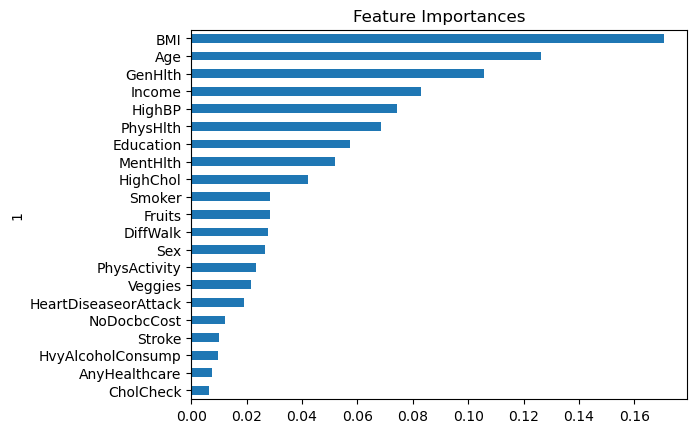

In [72]:
importances_sorted.plot(kind = 'barh', title = 'Feature Importances', legend = False)

In [73]:
# Second RandomForest model with more relevant columns
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [74]:
# Setting up x and y variables
x2 = df[['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education', 'MentHlth', 'HighChol']]
y2 = df['Diabetes_binary']

In [75]:
x2

,BMI,Age,GenHlth,Income,HighBP,PhysHlth,Education,MentHlth,HighChol
0,26.0,4.0,3.0,8.0,1.0,30.0,6.0,5.0,0.0
1,26.0,12.0,3.0,8.0,1.0,0.0,6.0,0.0,1.0
2,26.0,13.0,1.0,8.0,0.0,10.0,6.0,0.0,0.0
3,28.0,11.0,3.0,8.0,1.0,3.0,6.0,0.0,1.0
4,29.0,8.0,2.0,8.0,0.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
70687,37.0,6.0,4.0,1.0,0.0,0.0,4.0,0.0,1.0
70688,29.0,10.0,2.0,6.0,0.0,0.0,3.0,0.0,1.0
70689,25.0,13.0,5.0,4.0,1.0,0.0,6.0,15.0,1.0
70690,18.0,11.0,4.0,4.0,1.0,0.0,2.0,0.0,1.0


In [76]:
y2

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes_binary, Length: 70692, dtype: float64

In [79]:
# Splitting data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, random_state = 66)

In [80]:
scaler = StandardScaler()

In [81]:
X2_scaler = scaler.fit(X2_train)

In [82]:
X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

In [83]:
rf_model_2 = RandomForestClassifier(n_estimators = 200, random_state = 66)

In [84]:
rf_model_2 = rf_model_2.fit(X2_train_scaled, y2_train)

In [85]:
predictions2 = rf_model_2.predict(X2_test_scaled)

In [86]:
cm2 = confusion_matrix(y2_test, predictions2)
cm2_df = pd.DataFrame(
    cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
display(cm2_df)

,Predicted 0,Predicted 1
Actual 0,5955,2775
Actual 1,2280,6663


In [87]:
accuracy2 = accuracy_score(y2_test, predictions2)
print(f'Accuracy Score: {accuracy2}')

Accuracy Score: 0.7139704634187743


In [88]:
print(f'Classification Report: {classification_report(y2_test, predictions2)}')

Classification Report:               precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      8730
         1.0       0.71      0.75      0.72      8943

    accuracy                           0.71     17673
   macro avg       0.71      0.71      0.71     17673
weighted avg       0.71      0.71      0.71     17673



In [90]:
importances2 = rf_model_2.feature_importances_
importances2_df = sorted(zip(rf_model_2.feature_importances_, x2.columns), reverse=True)
importances2_df

[(0.22049168191700752, 'BMI'),
 (0.15352731418964932, 'Age'),
 (0.1321299445220992, 'GenHlth'),
 (0.11254869134750183, 'Income'),
 (0.09594484295553247, 'PhysHlth'),
 (0.09392905949438383, 'HighBP'),
 (0.0758913650585897, 'Education'),
 (0.0751250480572076, 'MentHlth'),
 (0.040412052458028536, 'HighChol')]

In [3]:
# Data Analysis for BMI and Age variables

# Getting dataset
data_analysis = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
data_analysis.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data = data_analysis[['BMI', 'Age']]
data

,BMI,Age
0,40.0,9.0
1,25.0,7.0
2,28.0,9.0
3,27.0,11.0
4,24.0,11.0
...,...,...
253675,45.0,5.0
253676,18.0,11.0
253677,28.0,2.0
253678,23.0,7.0


In [6]:
bmi = data['BMI']
age = data['Age']
bmi = pd.DataFrame(bmi)
age = pd.DataFrame(age)

In [7]:
age['Age'] = age['Age'].astype(str)

In [8]:
age['Age'] = age['Age'].replace('1.0', '18-24')
age['Age'] = age['Age'].replace('2.0', '25-29')
age['Age'] = age['Age'].replace('3.0', '30-34')
age['Age'] = age['Age'].replace('4.0', '35-39')
age['Age'] = age['Age'].replace('5.0', '40-44')
age['Age'] = age['Age'].replace('6.0', '45-49')
age['Age'] = age['Age'].replace('7.0', '50-54')
age['Age'] = age['Age'].replace('8.0', '55-59')
age['Age'] = age['Age'].replace('9.0', '60-64')
age['Age'] = age['Age'].replace('10.0', '65-69')
age['Age'] = age['Age'].replace('11.0', '70-74')
age['Age'] = age['Age'].replace('12.0', '75-79')
age['Age'] = age['Age'].replace('13.0', '80+')

In [9]:
age.value_counts()

Age  
60-64    33244
65-69    32194
55-59    30832
50-54    26314
70-74    23533
45-49    19819
80+      17363
40-44    16157
75-79    15980
35-39    13823
30-34    11123
25-29     7598
18-24     5700
dtype: int64

In [10]:
age['Age'] = age['Age'].replace('18 - 24', '18-24')

In [11]:
bmi.value_counts()

BMI 
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
86.0        1
90.0        1
91.0        1
78.0        1
96.0        1
Length: 84, dtype: int64

In [12]:
import matplotlib.pyplot as plt

In [14]:
data_analysis.shape

(253680, 22)

In [15]:
data_analysis

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [16]:
rstudio_df = data_analysis[['Diabetes_binary', 'BMI', 'Age']]

In [17]:
rstudio_df

,Diabetes_binary,BMI,Age
0,0.0,40.0,9.0
1,0.0,25.0,7.0
2,0.0,28.0,9.0
3,0.0,27.0,11.0
4,0.0,24.0,11.0
...,...,...,...
253675,0.0,45.0,5.0
253676,1.0,18.0,11.0
253677,0.0,28.0,2.0
253678,0.0,23.0,7.0


In [18]:
rstudio_df.to_csv('rstudio.csv')